# Evaluating PCG Pac-Man Maps!

## CornerSeekingAgent

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('corners.csv')
df.head()

,time,totalmoves,turns,leveltype,turns/width
0,0.284,330,74,generated,2.642857
1,0.281,336,71,generated,2.535714
2,0.218,247,42,generated,1.500000
3,0.281,303,59,generated,2.107143
4,0.200,206,31,generated,1.107143


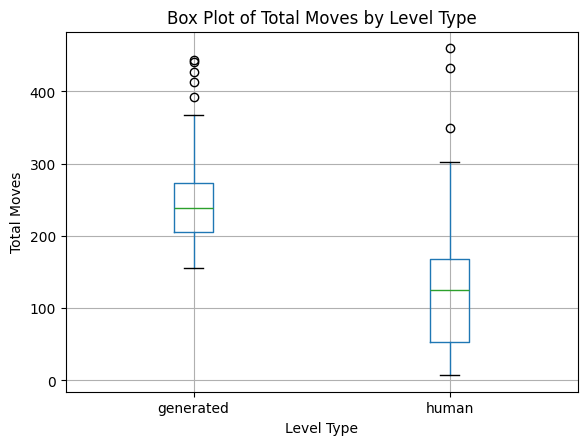

In [10]:
# Create a boxplot of total moves by level type
fig, ax = plt.subplots()
df.boxplot(column='totalmoves', by='leveltype', ax=ax)
ax.set_title('Box Plot of Total Moves by Level Type')
ax.set_ylabel('Total Moves')
ax.set_xlabel('Level Type')
plt.suptitle('')
plt.show()

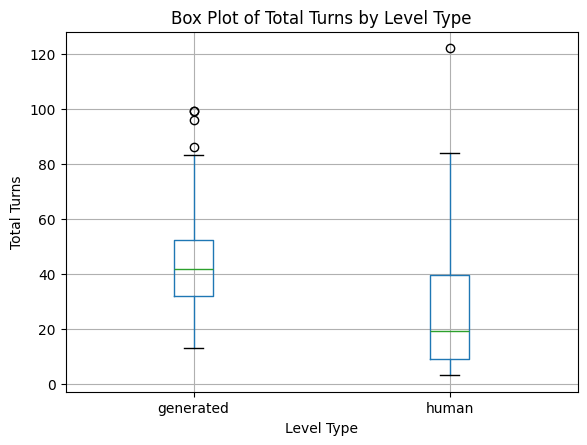

In [11]:
fig, ax = plt.subplots()
df.boxplot(column='turns', by='leveltype', ax=ax)
ax.set_title('Box Plot of Total Turns by Level Type')
ax.set_ylabel('Total Turns')
ax.set_xlabel('Level Type')
plt.suptitle('')
plt.show()

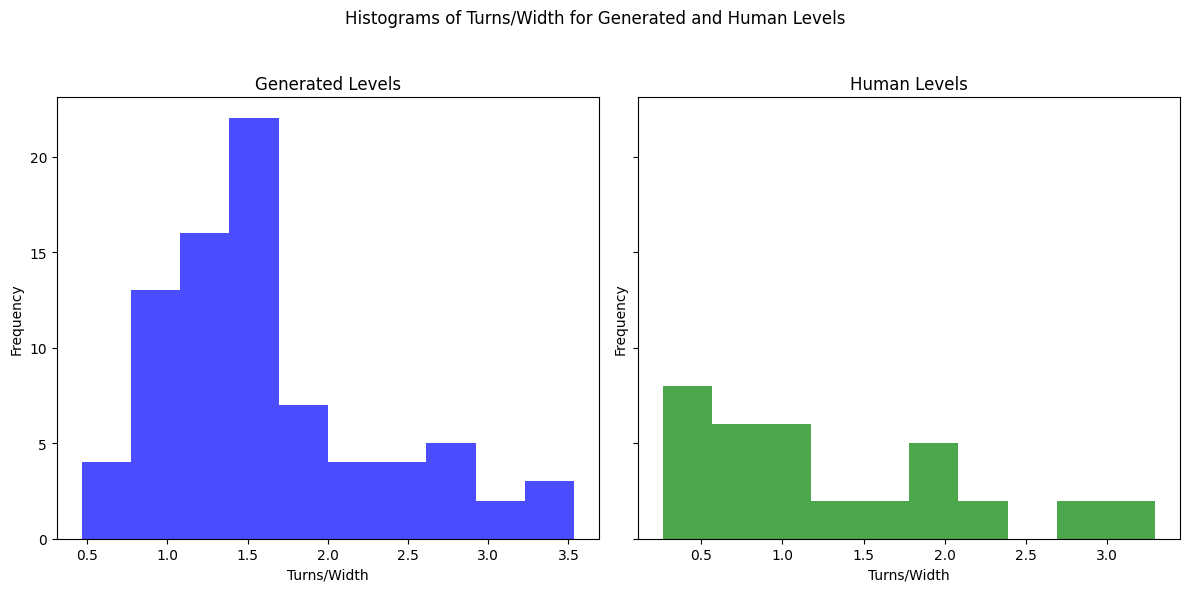

In [12]:
df_generated = df[df['leveltype'] == 'generated']
df_human = df[df['leveltype'] == 'human']

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)  # Share y-axis for comparison

axes[0].hist(df_generated['turns/width'], bins=10, color='blue', alpha=0.7)
axes[0].set_title('Generated Levels')
axes[0].set_xlabel('Turns/Width')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_human['turns/width'], bins=10, color='green', alpha=0.7)
axes[1].set_title('Human Levels')
axes[1].set_xlabel('Turns/Width')
axes[1].set_ylabel('Frequency')

plt.suptitle('Histograms of Turns/Width for Generated and Human Levels')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

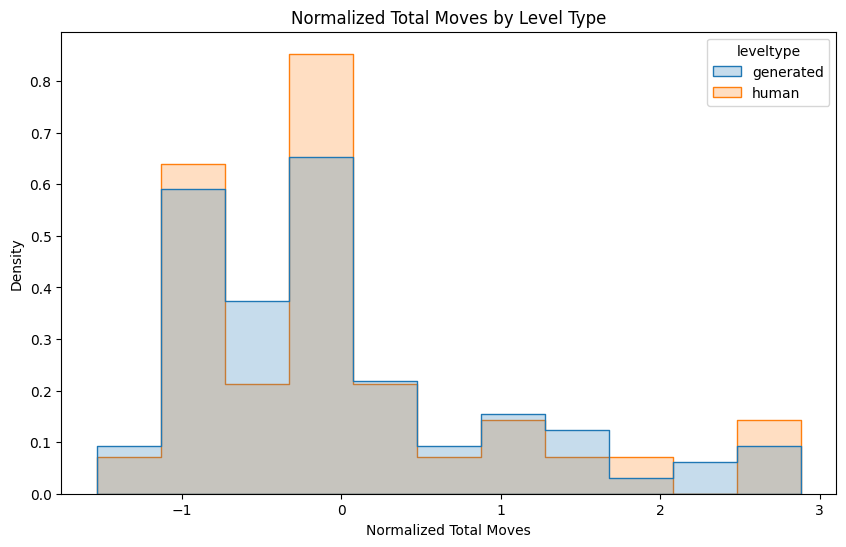

In [22]:
import seaborn as sns
group_stats = df.groupby('leveltype')['totalmoves'].agg(['mean', 'std'])

# Function to normalize data
def normalize(row):
    level = row['leveltype']
    return (row['totalmoves'] - group_stats.loc[level, 'mean']) / group_stats.loc[level, 'std']

# Apply normalization
df['normalized_moves'] = df.apply(normalize, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='normalized_moves', hue='leveltype', element='step', stat='density', common_norm=False)
plt.title('Normalized Total Moves by Level Type')
plt.xlabel('Normalized Total Moves')
plt.ylabel('Density')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


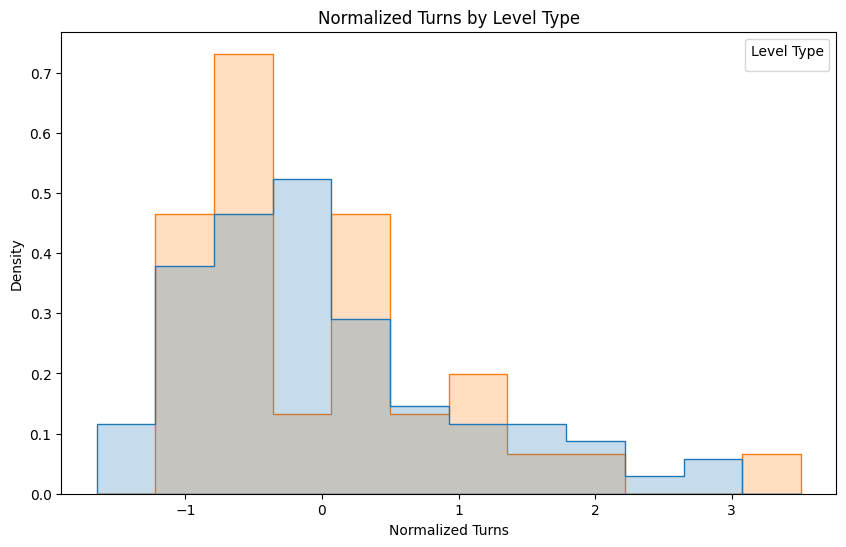

In [23]:
group_stats = df.groupby('leveltype')['turns'].agg(['mean', 'std'])

# Function to normalize data
def normalize(row):
    level = row['leveltype']
    return (row['turns'] - group_stats.loc[level, 'mean']) / group_stats.loc[level, 'std']

# Apply normalization
df['normalized_turns'] = df.apply(normalize, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='normalized_turns', hue='leveltype', element='step', stat='density', common_norm=False)
plt.title('Normalized Turns by Level Type')
plt.xlabel('Normalized Turns')
plt.ylabel('Density')
plt.legend(title='Level Type')
plt.show()

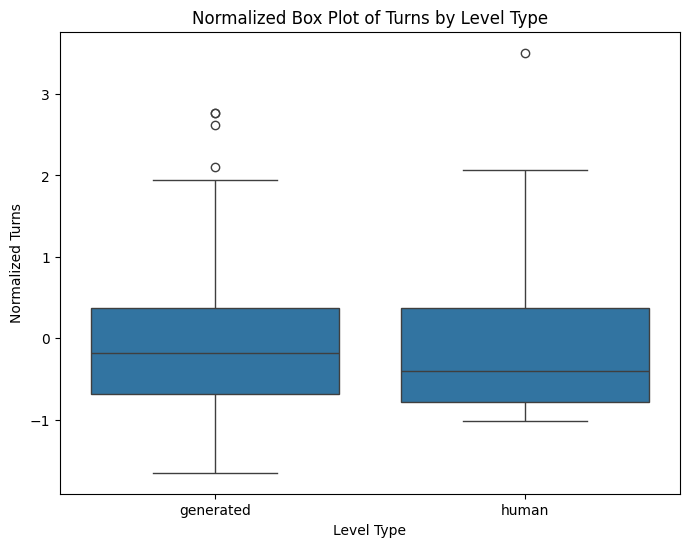

In [24]:
group_stats = df.groupby('leveltype')['turns'].agg(['mean', 'std'])

# Function to normalize data
def normalize(row):
    level = row['leveltype']
    return (row['turns'] - group_stats.loc[level, 'mean']) / group_stats.loc[level, 'std']

# Apply normalization
df['normalized_turns'] = df.apply(normalize, axis=1)

# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(x='leveltype', y='normalized_turns', data=df)
plt.title('Normalized Box Plot of Turns by Level Type')
plt.xlabel('Level Type')
plt.ylabel('Normalized Turns')
plt.show()

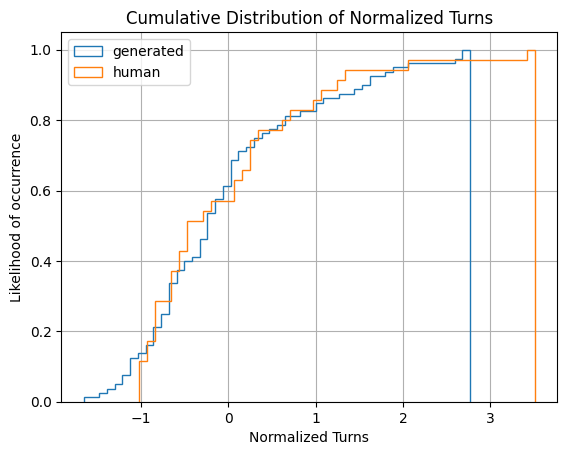

In [25]:
fig, ax = plt.subplots()
for label, group_df in df.groupby('leveltype'):
    group_df['normalized_turns'].hist(density=True, cumulative=True, histtype='step', bins=50, ax=ax, label=label)
ax.set_title('Cumulative Distribution of Normalized Turns')
ax.set_xlabel('Normalized Turns')
ax.set_ylabel('Likelihood of occurrence')
plt.legend()
plt.show()

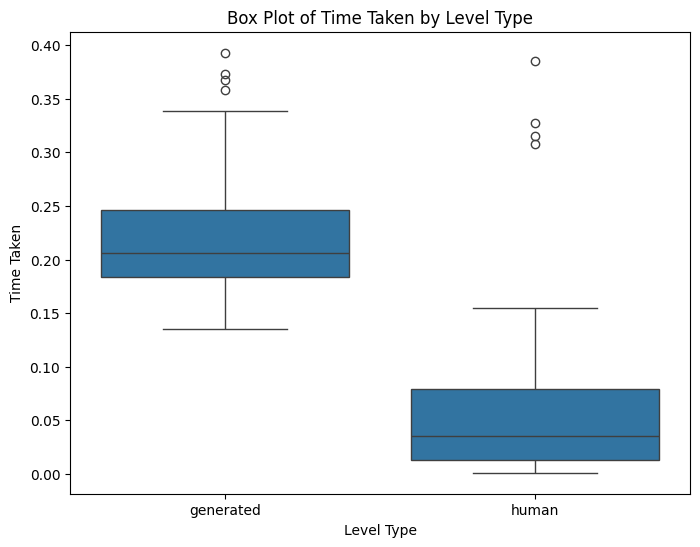

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='leveltype', y='time', data=df)
plt.title('Box Plot of Time Taken by Level Type')
plt.xlabel('Level Type')
plt.ylabel('Time Taken')
plt.show()

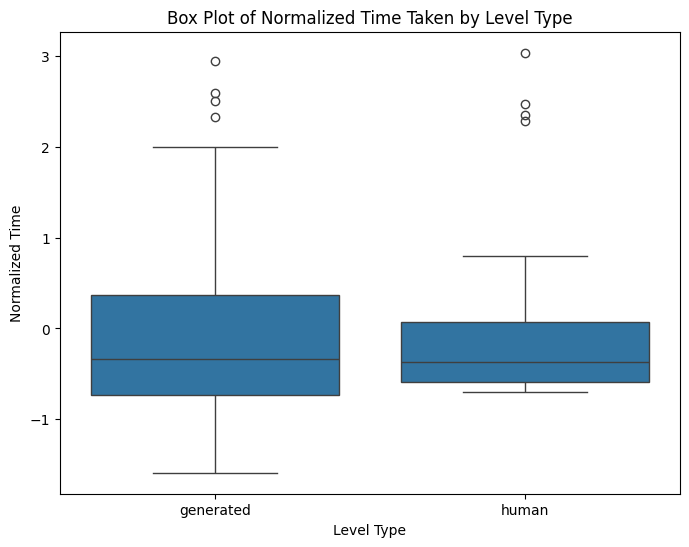

In [27]:
group_stats = df.groupby('leveltype')['time'].agg(['mean', 'std'])

# Normalize time data
def normalize_time(row):
    level_type = row['leveltype']
    mean = group_stats.at[level_type, 'mean']
    std = group_stats.at[level_type, 'std']
    return (row['time'] - mean) / std

df['normalized_time'] = df.apply(normalize_time, axis=1)

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='leveltype', y='normalized_time', data=df)
plt.title('Box Plot of Normalized Time Taken by Level Type')
plt.xlabel('Level Type')
plt.ylabel('Normalized Time')
plt.show()

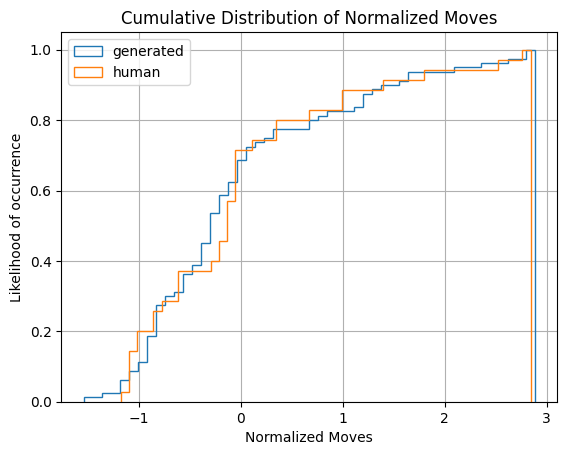

In [28]:
fig, ax = plt.subplots()
for label, group_df in df.groupby('leveltype'):
    group_df['normalized_moves'].hist(density=True, cumulative=True, histtype='step', bins=50, ax=ax, label=label)
ax.set_title('Cumulative Distribution of Normalized Moves')
ax.set_xlabel('Normalized Moves')
ax.set_ylabel('Likelihood of occurrence')
plt.legend()
plt.show()

## MDPAgent

In [30]:
df = pd.read_csv('mdp.csv')
df.head()

,avg_score,win_rate,level_type
0,2575.52,0.76,generated
1,2178.40,0.80,generated
2,2608.44,0.92,generated
3,2903.56,0.80,generated
4,2774.36,0.72,generated


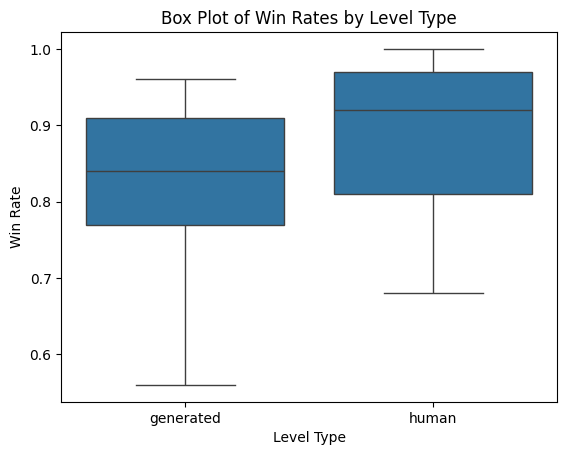

In [31]:
df_generated = df[df['level_type'] == 'generated']
df_human = df[df['level_type'] == 'human']

sns.boxplot(x='level_type', y='win_rate', data=df)
plt.title('Box Plot of Win Rates by Level Type')
plt.xlabel('Level Type')
plt.ylabel('Win Rate')

plt.show()

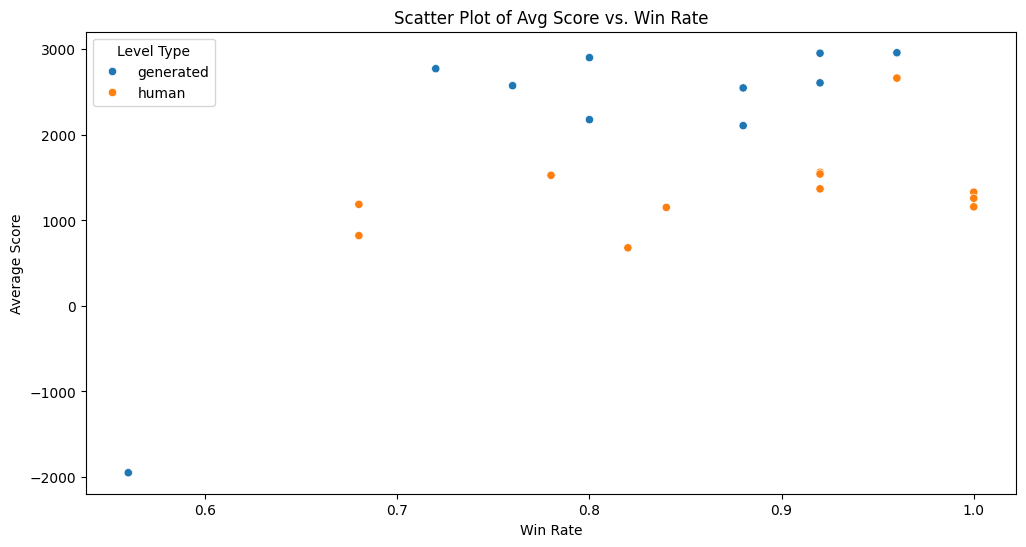

In [32]:
# Scatter Plot of Avg Score vs. Win Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x='win_rate', y='avg_score', hue='level_type', data=df)
plt.title('Scatter Plot of Avg Score vs. Win Rate')
plt.xlabel('Win Rate')
plt.ylabel('Average Score')
plt.legend(title='Level Type')
plt.show()

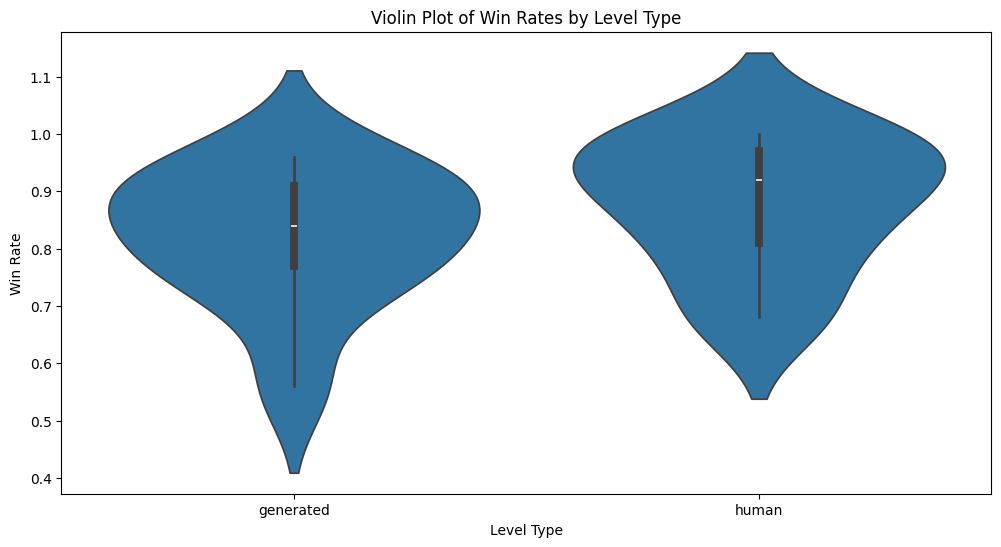

In [33]:
# Violin Plot for Win Rates
plt.figure(figsize=(12, 6))
sns.violinplot(x='level_type', y='win_rate', data=df)
plt.title('Violin Plot of Win Rates by Level Type')
plt.xlabel('Level Type')
plt.ylabel('Win Rate')
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_22316\2242049894.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_generated['win_rate'], label='Generated', shade=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_22316\2242049894.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_human['win_rate'], label='Human', shade=True)


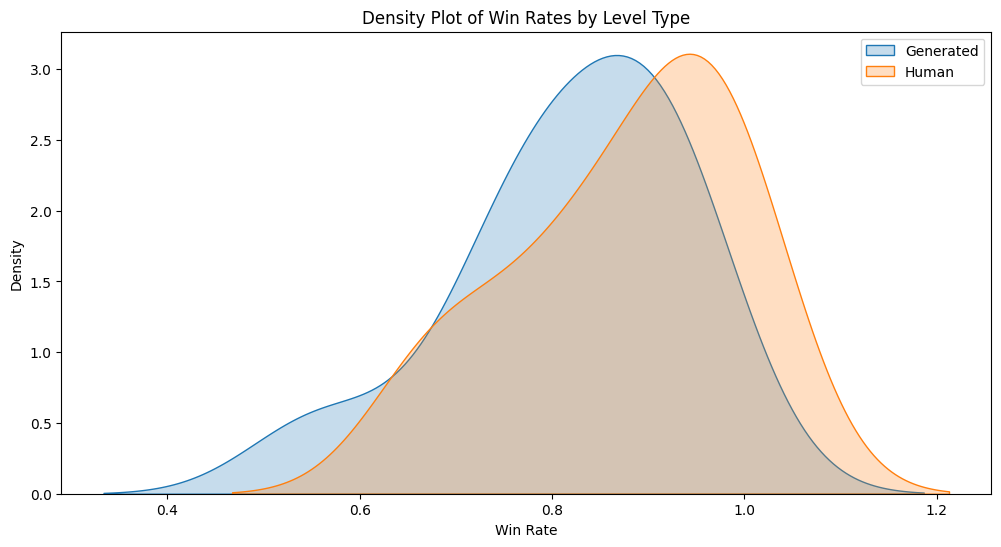

In [34]:
# Density Plot for Win Rates
plt.figure(figsize=(12, 6))
sns.kdeplot(df_generated['win_rate'], label='Generated', shade=True)
sns.kdeplot(df_human['win_rate'], label='Human', shade=True)
plt.title('Density Plot of Win Rates by Level Type')
plt.xlabel('Win Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

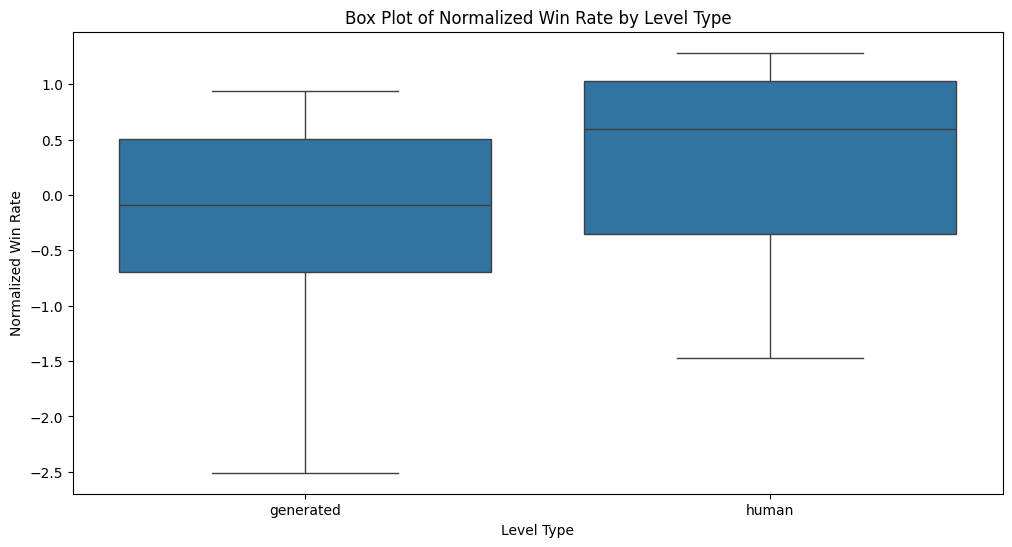

In [35]:
from scipy.stats import zscore

# Normalize the data
df['normalized_avg_score'] = zscore(df['avg_score'])
df['normalized_win_rate'] = zscore(df['win_rate'])

# Box Plot Normalized Win Rate
plt.figure(figsize=(12, 6))
sns.boxplot(x='level_type', y='normalized_win_rate', data=df)
plt.title('Box Plot of Normalized Win Rate by Level Type')
plt.xlabel('Level Type')
plt.ylabel('Normalized Win Rate')
plt.show()

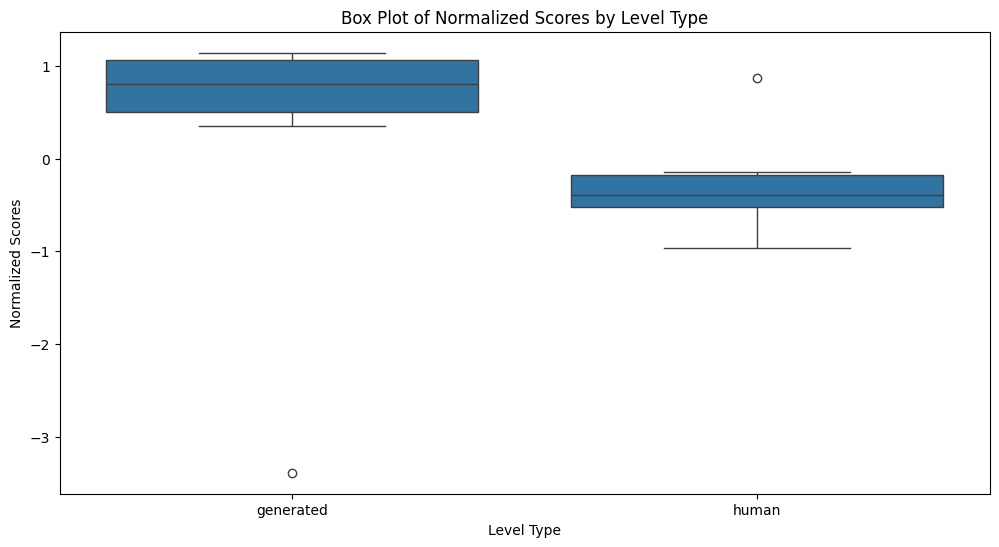

In [36]:
# Box Plot Normalized Scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='level_type', y='normalized_avg_score', data=df)
plt.title('Box Plot of Normalized Scores by Level Type')
plt.xlabel('Level Type')
plt.ylabel('Normalized Scores')
plt.show()

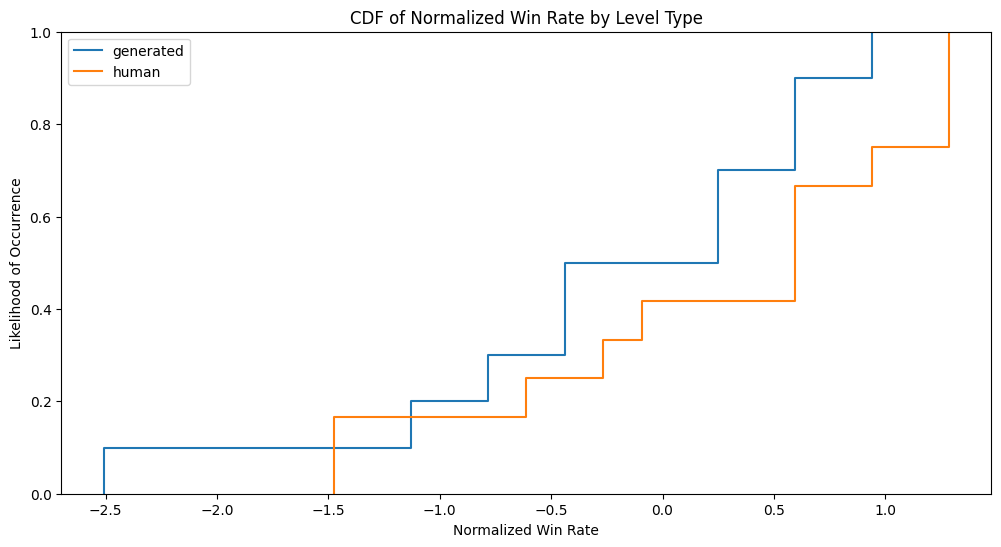

In [37]:
# CDF Normalized Win Rate
plt.figure(figsize=(12, 6))
sns.ecdfplot(df[df['level_type'] == 'generated']['normalized_win_rate'], label='generated')
sns.ecdfplot(df[df['level_type'] == 'human']['normalized_win_rate'], label='human')
plt.title('CDF of Normalized Win Rate by Level Type')
plt.xlabel('Normalized Win Rate')
plt.ylabel('Likelihood of Occurrence')
plt.legend()
plt.show()

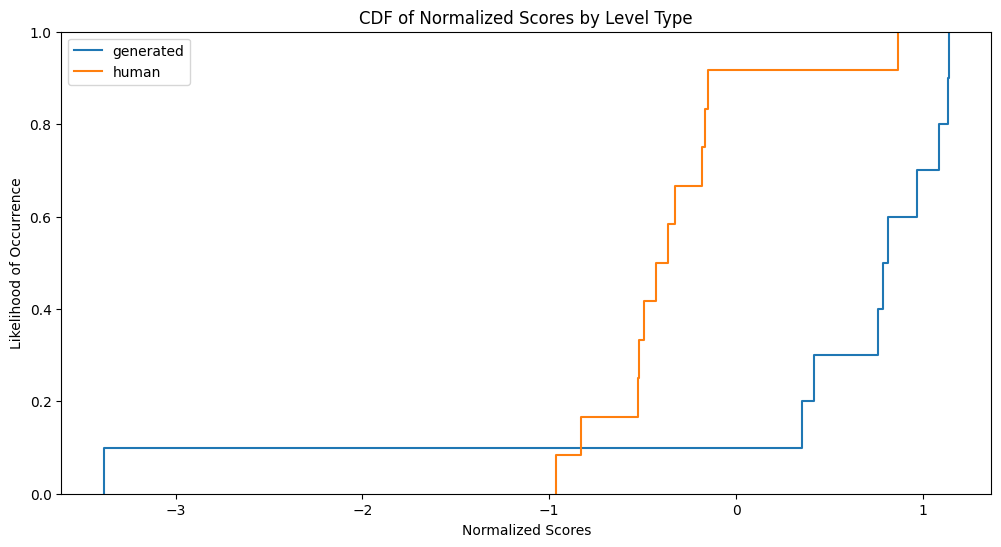

In [38]:
# CDF Normalized Scores
plt.figure(figsize=(12, 6))
sns.ecdfplot(df[df['level_type'] == 'generated']['normalized_avg_score'], label='generated')
sns.ecdfplot(df[df['level_type'] == 'human']['normalized_avg_score'], label='human')
plt.title('CDF of Normalized Scores by Level Type')
plt.xlabel('Normalized Scores')
plt.ylabel('Likelihood of Occurrence')
plt.legend()
plt.show()

## RL Agent

In [39]:
df = pd.read_csv('rl.csv')
df.head()

,avg_scores,win_rate,level_type,avg_train_time,total_train_time
0,2977.56,0.96,generated,9.9822,49.911
1,3084.60,0.98,generated,9.3792,46.896
2,2881.58,0.98,generated,10.8376,54.188
3,3118.56,0.96,generated,9.2252,46.126
4,3096.84,0.98,generated,9.5954,47.977


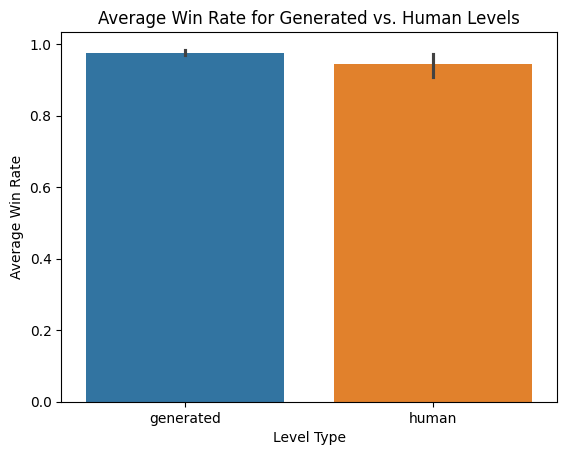

In [51]:
sns.barplot(x='level_type', y='win_rate', data=df, estimator='mean', hue='level_type')
plt.title('Average Win Rate for Generated vs. Human Levels')
plt.xlabel('Level Type')
plt.ylabel('Average Win Rate')
plt.show()

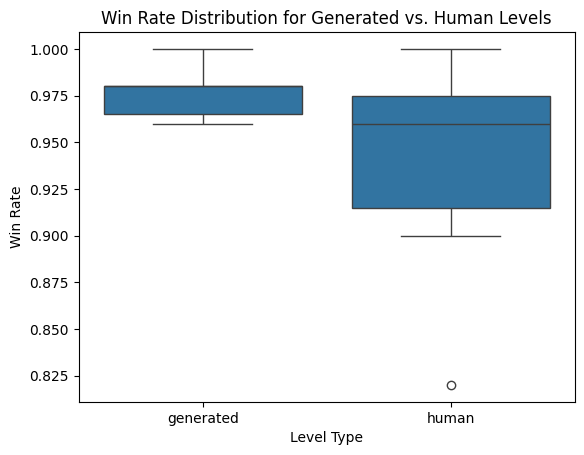

In [52]:
sns.boxplot(x='level_type', y='win_rate', data=df)
plt.title('Win Rate Distribution for Generated vs. Human Levels')
plt.xlabel('Level Type')
plt.ylabel('Win Rate')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


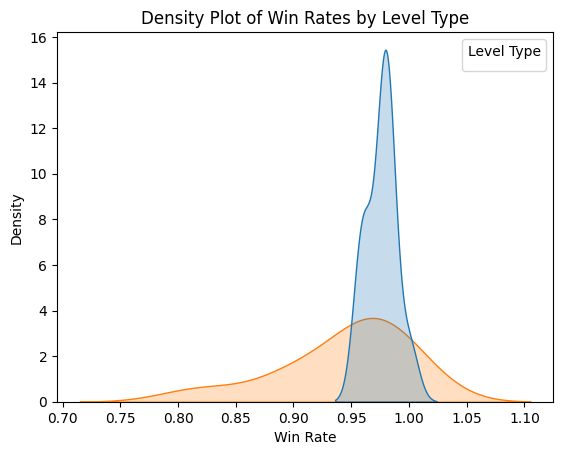

In [55]:
sns.kdeplot(data=df, x='win_rate', hue='level_type', fill=True)
plt.title('Density Plot of Win Rates by Level Type')
plt.xlabel('Win Rate')
plt.ylabel('Density')
plt.legend(title='Level Type')
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['normalized_win_rate'] = scaler.fit_transform(df[['win_rate']])
df['normalized_avg_score'] = scaler.fit_transform(df[['avg_scores']])
df['normalized_avg_train_time'] = scaler.fit_transform(df[['avg_train_time']])
df['nomralized_total_train_time'] = scaler.fit_transform(df[['total_train_time']])


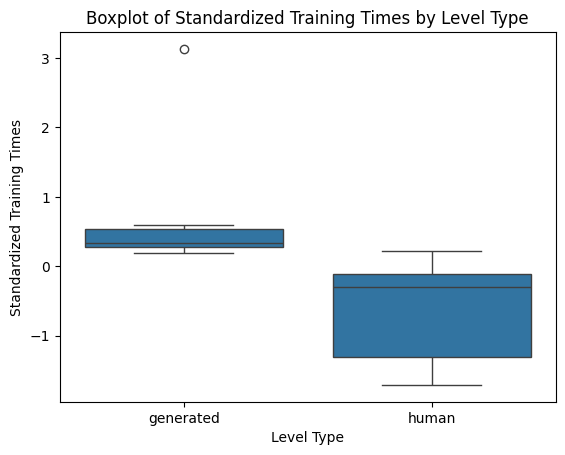

In [64]:
sns.boxplot(x='level_type', y='nomralized_total_train_time', data=df)
plt.title('Boxplot of Standardized Training Times by Level Type')
plt.xlabel('Level Type')
plt.ylabel('Standardized Training Times')
plt.show()